# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods

### Goal
The use of first- and second-order methods (Gradient Descent, Non-linear
Conjugate Gradient Descent, Newton’s method and Levenberg-Marquardt
algorithm) in the tasks of unconstrained nonlinear optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

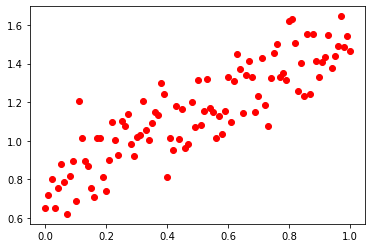

In [2]:
# Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1)
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Noisy data generation
xk = np.array([k / 100 for k in range(101)])
yk = np.array([alpha * k + beta + np.random.normal(0.5, 0.125) for k in xk])

plt.scatter(xk, yk, c='r')

Gradient descent method of optimization

In [3]:
# create gradient descent function
def gradient_descent(xk, yk, w, b, lr, func_type):
    # initialize variable
    d1dw = 0.0
    d1db = 0.0
    N= xk.shape[0]
    
    # loss linear = (wx + b - y) ** 2
    # loss rational = (b / (1 + wx) - y) ** 2
    for xi, yi in zip(xk, yk):
        # gradient step
        if func_type == 'linear':
            d1dw += 2 * (w * xi + b - yi) * xi
            d1db += 2 * (w * xi + b - yi)
        else:
            d1dw += 2 * (w / (1 + b * xi) - yi) / (1 + b * xi)
            d1db += 2 * (w / (1 + b * xi) - yi) * (- xi * w / (1 + b * xi) ** 2)
    
    # make an updates to the parameters
    w = w - lr * (1 / N) * d1dw
    b = b - lr * (1 / N) * d1db
    return w, b

In [4]:
# train function
def train(xk, yk, num_epoch, lr, func_type):  
    w, b = 0.0, 0.0
    for epoch in range(num_epoch):
        # run gradient descent
        w, b = gradient_descent(xk, yk, w, b, lr, func_type)
        yhat = w * xk + b if func_type == 'linear' else w / (1 + b * xk)
        loss = np.divide(np.sum((yhat - yk) ** 2, axis=0), xk.shape[0])
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {round(loss, 4)}, true: {round(alpha, 4), round(beta, 4)}, curr: {round(w, 4), round(b, 4)}')
    return w, b

Start training for linear
epoch: 0, loss: 1.32, true: (0.6986, 0.2911), curr: (0.0128, 0.023)
epoch: 10, loss: 0.798, true: (0.6986, 0.2911), curr: (0.1246, 0.2232)
epoch: 20, loss: 0.4857, true: (0.6986, 0.2911), curr: (0.2118, 0.3777)
epoch: 30, loss: 0.2988, true: (0.6986, 0.2911), curr: (0.28, 0.4968)
epoch: 40, loss: 0.1869, true: (0.6986, 0.2911), curr: (0.3335, 0.5885)
epoch: 50, loss: 0.1199, true: (0.6986, 0.2911), curr: (0.3756, 0.659)
epoch: 60, loss: 0.0798, true: (0.6986, 0.2911), curr: (0.4088, 0.7132)
epoch: 70, loss: 0.0557, true: (0.6986, 0.2911), curr: (0.4352, 0.7547)
epoch: 80, loss: 0.0413, true: (0.6986, 0.2911), curr: (0.4564, 0.7865)
epoch: 90, loss: 0.0326, true: (0.6986, 0.2911), curr: (0.4734, 0.8107)
epoch: 100, loss: 0.0274, true: (0.6986, 0.2911), curr: (0.4872, 0.8291)
epoch: 110, loss: 0.0242, true: (0.6986, 0.2911), curr: (0.4986, 0.8429)
epoch: 120, loss: 0.0222, true: (0.6986, 0.2911), curr: (0.508, 0.8533)
epoch: 130, loss: 0.021, true: (0.6986, 0.29

epoch: 2040, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7364, 0.7835)
epoch: 2050, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7366, 0.7834)
epoch: 2060, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7368, 0.7833)
epoch: 2070, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.737, 0.7832)
epoch: 2080, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7373, 0.7831)
epoch: 2090, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7375, 0.783)
epoch: 2100, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7377, 0.7828)
epoch: 2110, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7379, 0.7827)
epoch: 2120, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7381, 0.7826)
epoch: 2130, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7383, 0.7825)
epoch: 2140, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7385, 0.7824)
epoch: 2150, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7387, 0.7823)
epoch: 2160, loss: 0.0152, true: (0.6986, 0.2911), curr: (0.7389, 0.7822)
epoch: 2170, loss: 0.0152, true: (0.6986

epoch: 1240, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8598, -0.46)
epoch: 1250, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8598, -0.46)
epoch: 1260, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8598, -0.46)
epoch: 1270, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8597, -0.4601)
epoch: 1280, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8597, -0.4601)
epoch: 1290, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8597, -0.4601)
epoch: 1300, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8597, -0.4601)
epoch: 1310, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8597, -0.4601)
epoch: 1320, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8596, -0.4602)
epoch: 1330, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8596, -0.4602)
epoch: 1340, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8596, -0.4602)
epoch: 1350, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8596, -0.4602)
epoch: 1360, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8596, -0.4602)
epoch: 1370, loss: 0.0171, true

epoch: 2840, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2850, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2860, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2870, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2880, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2890, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2900, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2910, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2920, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2930, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2940, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2950, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2960, loss: 0.0171, true: (0.6986, 0.2911), curr: (0.8593, -0.4605)
epoch: 2970, loss: 0.0171

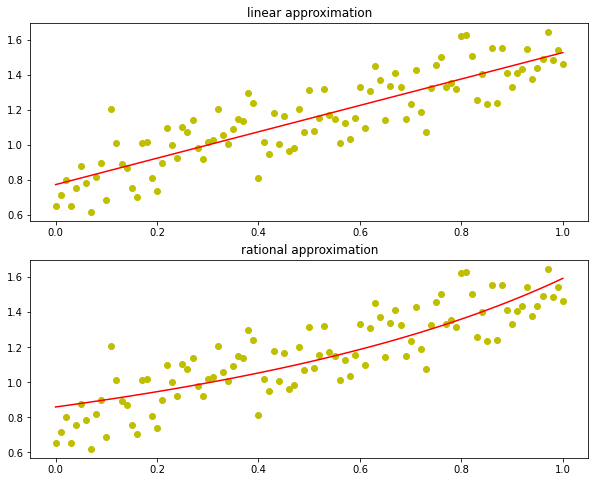

In [17]:
num_epochs = 5000
lr = 0.01
eps = 0.001
func_types = ['linear', 'rational']

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, func in enumerate(func_types):
    print(f'Start training for {func}')
    w, b = train(xk, yk, num_epochs, lr, func)
    
    axs[i].scatter(xk, yk, c='y')
    if func == 'linear':
        GD_linear = [w, b]
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        GD_rat = [w, b]
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(' ')

Conjugate Gradient descent method of optimization

In [20]:
# create approximation functions
def linear(wb):
    w, b = wb
    return np.sum((w * xk + b - yk) ** 2, axis=0)

def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * xk) - yk) ** 2, axis=0)

Start training for <function linear at 0x7fa9b8806f70>
Optimization terminated successfully.
         Current function value: 1.533416
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Founded values: (0.7533701097567784, 0.7744314141796363), real values: (0.6986403836355417, 0.29113963169036083)
 
Start training for <function rational at 0x7fa9b8806ee0>
Optimization terminated successfully.
         Current function value: 1.722500
         Iterations: 10
         Function evaluations: 70
         Gradient evaluations: 23
Founded values: (0.8593148435810504, -0.4605121844867301), real values: (0.6986403836355417, 0.29113963169036083)
 


/tmp/ipykernel_29500/111573855.py:9: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})
/tmp/ipykernel_29500/111573855.py:9: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})


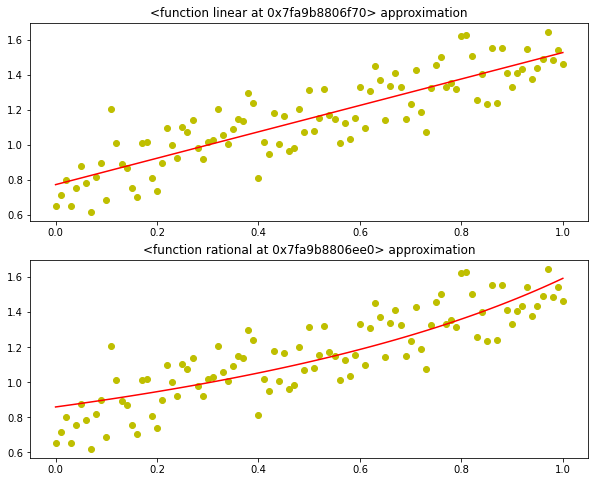

In [23]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})
    w, b = CGD.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        CGD_linear = CGD.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        CGD_rat = CGD.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Newton’s method of optimization

In [24]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return np.sum((w * xk + b - yk) ** 2, axis=0)

def d_linear(wb):
    w, b = wb
    return np.array([np.sum(2 * xk * (b + w * xk - yk)), np.sum(2 * (b + w * xk - yk))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * xk**2)
    hess[0,1] = np.sum(2 * xk)
    hess[1,0] = np.sum(2 * xk)
    hess[1,1] = (2)
    return hess

# for rational
def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * xk) - yk) ** 2, axis=0)

def d_rational(wb):
    w, b = wb
    return np.array([np.sum((w/(1+b*xk) - yk)*2/(1+b*xk)), np.sum(2*w*xk/(1+b*xk)**2 * (w/(1+b*xk)-yk))])

def hess_rat(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,0] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,1] = np.sum(2 * w**2 * xk**2 / (1+b*xk)**4 * 4 * w * xk**2 * (w/(1+b*xk)-yk) / (1+b*xk)**3)
    return hess

Start training for <function linear at 0x7fa9b889f1f0>
Optimization terminated successfully.
         Current function value: 1.533506
         Iterations: 8
         Function evaluations: 16
         Gradient evaluations: 16
         Hessian evaluations: 8
Founded values: (0.7566059096368475, 0.7727411296797729), real values: (0.6986403836355417, 0.29113963169036083)
 
Start training for <function rational at 0x7fa9b889fc10>
Optimization terminated successfully.
         Current function value: 1.724343
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
         Hessian evaluations: 3
Founded values: (0.8539406085340931, -0.46700790829637134), real values: (0.6986403836355417, 0.29113963169036083)
 


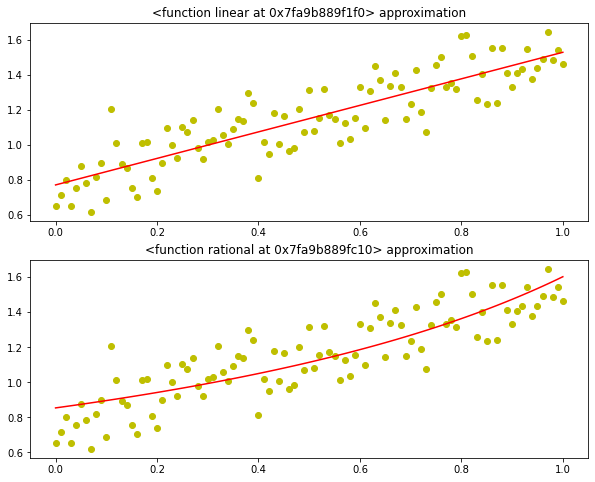

In [25]:
# types of approximation fuctions
func_types = [linear, rational]
jac_types = [d_linear, d_rational]
hess_types = [hess_lin, hess_rat]
start_values = [[1.0, 1.0], [1.1, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, jac, hess, start) in enumerate(zip(func_types, 
                                          jac_types, 
                                          hess_types,
                                          start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method
    newton = minimize(func, start, method='Newton-CG', jac=jac, hess=hess, options={'xtol': 1e-3, 'disp':True})
    w, b = newton.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        Newton_linear = newton.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        Newton_rat = newton.x
        axs[i].plot(xk, w / (1 + b * xk), 'r')
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Levenberg-Marquardt method of optimization

In [26]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return (w * xk + b - yk) ** 2

# for rational
def rational(wb):
    w, b = wb
    return (w / (1 + b * xk) - yk) ** 2

Start training for <function linear at 0x7fa9b8a6bc10>
Founded values: (0.7347073908379637, 0.7906275507104241), real values: (0.6986403836355417, 0.29113963169036083)
 
Start training for <function rational at 0x7fa9b8a6bf70>
Founded values: (0.85684857475556, -0.47111024918586886), real values: (0.6986403836355417, 0.29113963169036083)
 


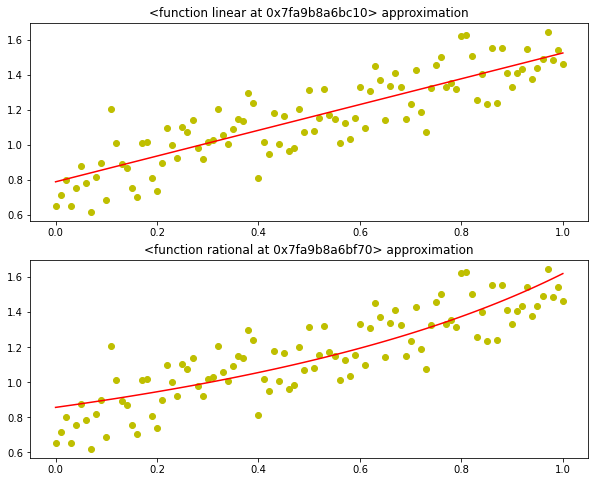

In [27]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    lma = optimize.least_squares(func, start, method="lm", xtol=1e-3)
    w, b = lma.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        lma_linear = lma.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        lma_rat = lma.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Plot all linear results

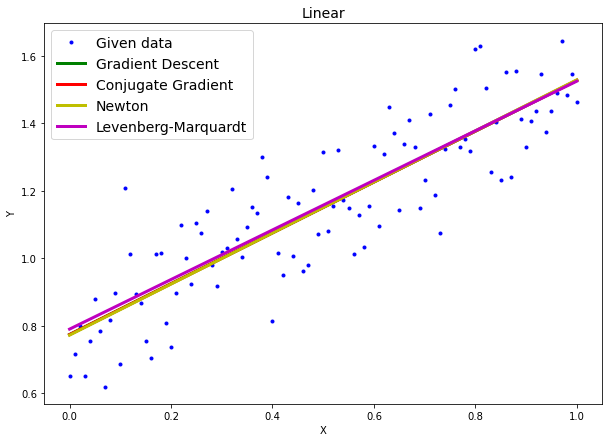

In [28]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Plot all rational results

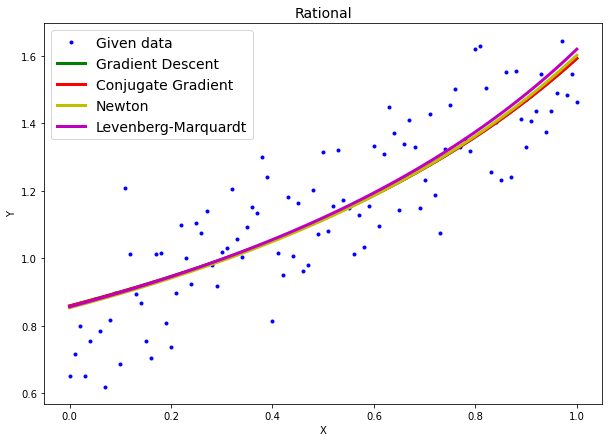

In [29]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Compare results with methods from Task 2 for the same dataset

In [98]:
### The methods from Task 2 have been implemented here, ###
### but already have been cleared to save place ###

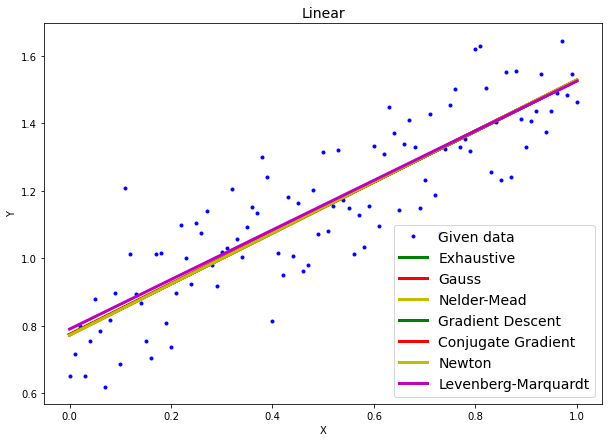

In [36]:
# Comparison for the linear approximation
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_lin[0]*xk + exh_lin[1], 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_lin[0]*xk + gs_lin[1], 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_lin[0]*xk + nm_lin[1], 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

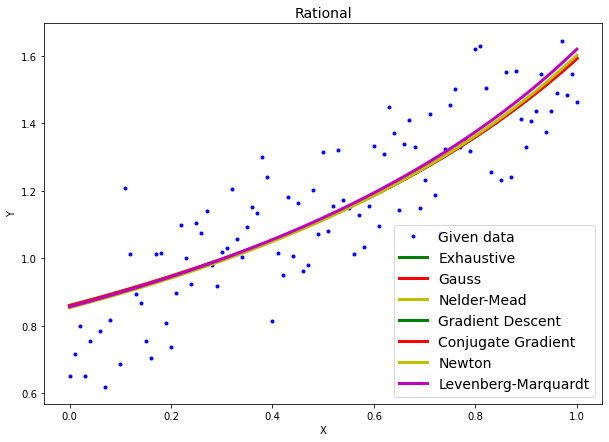

In [37]:
# Comparison for the rational approximation
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)